In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.16.1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
data = np.load('data/face_images.npz')

In [4]:
faces_df = pd.read_csv('data/facial_keypoints.csv')
faces_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [5]:
len(faces_df.columns)

30

In [6]:
len(faces_df)

7049

In [7]:
data['face_images'][ :, :, 0]

/tmp/ipykernel_26/744293993.py:1: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  data['face_images'][ :, :, 0]


array([[238., 236., 237., ..., 250., 250., 250.],
       [235., 238., 236., ..., 249., 250., 251.],
       [237., 236., 237., ..., 251., 251., 250.],
       ...,
       [186., 183., 181., ...,  52.,  57.,  60.],
       [189., 188., 207., ...,  61.,  69.,  78.],
       [191., 184., 184., ...,  70.,  75.,  90.]])

/tmp/ipykernel_26/2210073284.py:1: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  plt.imshow(data['face_images'][:, :, 0], cmap='gray')


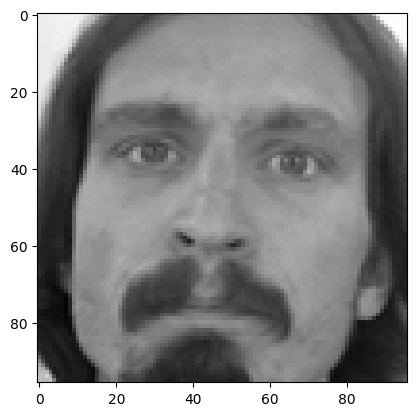

In [8]:
plt.imshow(data['face_images'][:, :, 0], cmap='gray')

In [9]:
data['face_images'].shape
data_cp = data['face_images']


/tmp/ipykernel_26/41720784.py:1: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  data['face_images'].shape
/tmp/ipykernel_26/41720784.py:2: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  data_cp = data['face_images']


In [10]:
data_cp = np.moveaxis(data_cp, -1,0)
data_cp.shape

(7049, 96, 96)

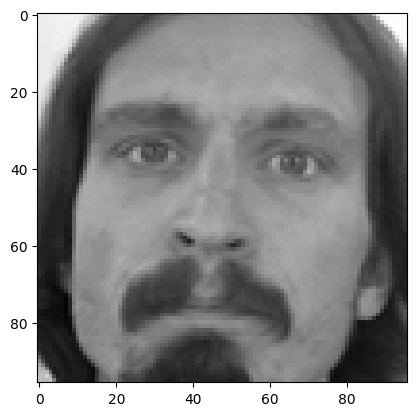

In [11]:
plt.imshow(data_cp[0], cmap='gray')

In [12]:
def plot_face_landmark(index):
    plt.imshow(data_cp[index], cmap = 'gray')
    plt.scatter(faces_df.iloc[index][0: -1: 2], faces_df.iloc[index][1: : 2], cmap = 'y')
    plt.show()

/tmp/ipykernel_26/3270968503.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(faces_df.iloc[index][0: -1: 2], faces_df.iloc[index][1: : 2], cmap = 'y')


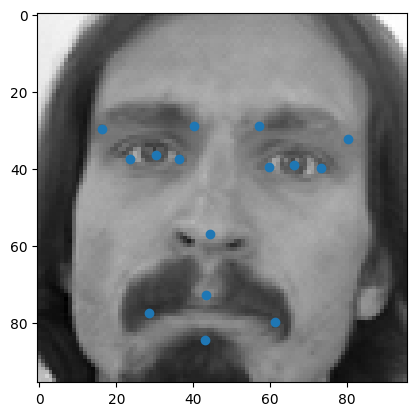

In [13]:
plot_face_landmark(0)

/tmp/ipykernel_26/3270968503.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(faces_df.iloc[index][0: -1: 2], faces_df.iloc[index][1: : 2], cmap = 'y')


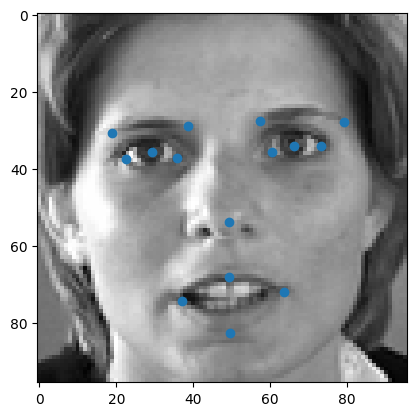

In [14]:
plot_face_landmark(890)

/tmp/ipykernel_26/3270968503.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(faces_df.iloc[index][0: -1: 2], faces_df.iloc[index][1: : 2], cmap = 'y')


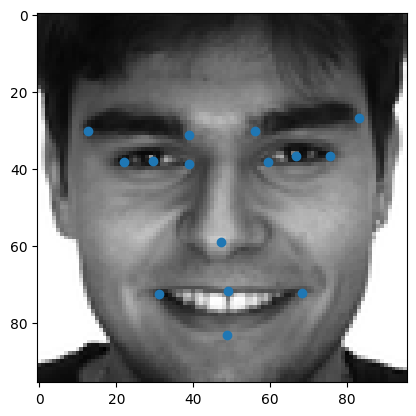

In [15]:
import random
plot_face_landmark(random.randint(0, 7049))

In [26]:
faces_df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [48]:
faces_df.isna().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [49]:
def fill_df(df):
    for i in df.columns[df.isnull().any(axis=0)]:     
        df[i].fillna(df[i].mean(),inplace=True)

In [50]:
fill_df(faces_df)
faces_df.isna().sum()

/tmp/ipykernel_26/3984852299.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(),inplace=True)


left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
dtype: int64

In [87]:
from keras.layers import Conv2D, Dense, Flatten, Input, Dropout, BatchNormalization, MaxPool2D, ReLU
from keras import Sequential
from keras.models import Model
from keras.losses import MeanAbsoluteError

In [68]:
model1 = Sequential()
model1.add(Input(shape=(96,96,1)))
model1.add(Conv2D(128, (3,3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2,2)))
model1.add(Dropout(0.5))
model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2,2)))
model1.add(Dropout(0.5))
model1.add(Conv2D(32, (3,3), activation='relu'))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(30, activation='relu'))

model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 94, 94, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 94, 94, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 47, 47, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 47, 47, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 45, 45, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 45, 45, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 20, 20, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 30)             │         1,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,743,038 (6.65 MB)

 Trainable params: 1,742,654 (6.65 MB)

 Non-trainable params: 384 (1.50 KB)

In [69]:
model1.compile('adam', 'mean_absolute_error')

In [53]:
X = data_cp.copy()
y = faces_df.to_numpy()

In [54]:
print(X.shape)
print(y.shape)

(7049, 96, 96)
(7049, 30)


In [55]:
y

array([[66.03356391, 39.00227368, 30.22700752, ..., 72.93545865,
        43.13070677, 84.48577444],
       [64.33293617, 34.9700766 , 29.9492766 , ..., 70.26655319,
        45.46791489, 85.48017021],
       [65.05705263, 34.90964211, 30.90378947, ..., 70.19178947,
        47.27494737, 78.65936842],
       ...,
       [66.69073171, 36.84522146, 31.66641951, ..., 72.9194426 ,
        49.46257171, 78.11712   ],
       [70.96508235, 39.85366588, 30.54328471, ..., 72.9194426 ,
        50.06518588, 79.58644706],
       [66.93831111, 43.42450963, 31.09605926, ..., 72.9194426 ,
        45.90048   , 82.7730963 ]])

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [61]:
def standardize(train, test):
    train_mean = np.mean(train, axis=0)
    train_std = np.std(train, axis=0)
    return ((train - train_mean) / (train_std), (test - train_mean) / (train_std))

In [62]:
print(y_test)

[[68.65093333 37.21293333 28.35213333 ... 72.9194426  49.25906667
  79.93586667]
 [65.67965825 37.57191146 30.12363495 ... 72.9194426  46.7712
  84.63732816]
 [67.83202974 37.10917472 28.10480297 ... 78.98837175 42.17469145
  85.94034201]
 ...
 [61.95030818 35.63380359 25.29642734 ... 74.13537872 46.86853856
  80.39161759]
 [62.80689231 37.23825231 37.54436923 ... 72.9194426  48.47876923
  71.17319385]
 [70.61674667 43.39072    32.33184    ... 72.9194426  40.42016
  78.97962667]]


In [63]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5639, 96, 96) (5639, 30)
(1410, 96, 96) (1410, 30)


In [72]:
history = model1.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=40)

Epoch 1/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 5.9790 - val_loss: 11.0445
Epoch 2/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 5.2337 - val_loss: 11.5143
Epoch 3/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.7581 - val_loss: 11.8364
Epoch 4/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.5503 - val_loss: 10.0565
Epoch 5/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.5328 - val_loss: 9.5688
Epoch 6/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.6703 - val_loss: 14.7476
Epoch 7/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.2663 - val_loss: 12.4087
Epoch 8/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.2753 - val_loss: 8.1725
Epoch 9/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.3699 - val_loss: 10.9659
Epoch 10/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.1826 - val_loss: 7.4664
Epoch 11/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.2185 - val_loss: 8.7643
Epoch 12/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 8

In [73]:
history.history

{'loss': [5.834865093231201,
  4.891258716583252,
  4.660397529602051,
  4.518649101257324,
  4.457489013671875,
  4.499168395996094,
  4.293410301208496,
  4.380507469177246,
  4.308907985687256,
  4.183342933654785,
  4.144914150238037,
  4.183142185211182,
  4.137977600097656,
  4.1220808029174805,
  3.09208607673645,
  2.914008378982544,
  2.853485584259033,
  2.787034273147583,
  2.778348684310913,
  2.7842659950256348,
  2.831401824951172,
  2.8060994148254395,
  2.7142269611358643,
  2.7190465927124023,
  2.6753556728363037,
  2.7306766510009766,
  2.642848253250122,
  2.5747199058532715,
  2.6085598468780518,
  2.5865156650543213,
  2.547762632369995,
  2.548675298690796,
  2.544205904006958,
  2.593073844909668,
  2.5455751419067383,
  2.558818817138672,
  2.5470359325408936,
  2.521087646484375,
  2.508667230606079,
  2.482008695602417],
 'val_loss': [11.04453182220459,
  11.514298439025879,
  11.836435317993164,
  10.056477546691895,
  9.568775177001953,
  14.747580528259277

In [76]:
def plot_learning_curve(train_loss, val_loss):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss - MAE")
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

In [95]:
def train_model(model, train_size=0.8, random_state=42, epochs=40):
    X = data_cp.copy()
    y = faces_df.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)
    model.compile('adam', 'mean_absolute_error')
    history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=epochs)
    
    plot_learning_curve(history.history['loss'], history.history['val_loss'])
    

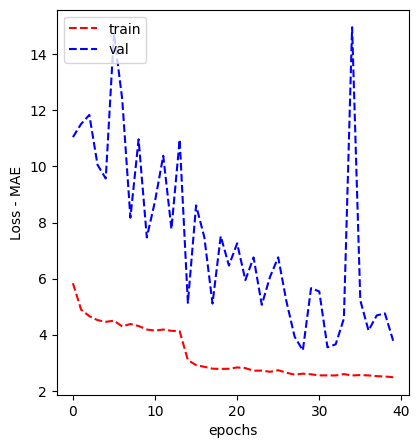

In [77]:
plot_learning_curve(history.history['loss'], history.history['val_loss'])

In [111]:
def create_conv_layers(input_layer, initial_units=256):
    x = Conv2D(initial_units, kernel_size=(3,3), activation='relu')(input_layer)
    x = Conv2D(initial_units, kernel_size=(3,3), activation='relu')(x)
    x = MaxPool2D((2,2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(int(initial_units / 2), kernel_size=(3,3), activation='relu')(x)
    x = Conv2D(int(initial_units / 2), kernel_size=(3,3), activation='relu')(x)
    x = MaxPool2D((2,2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(int(initial_units / 4), kernel_size=(3,3), activation='relu')(x)
    x = Conv2D(int(initial_units / 4), kernel_size=(3,3), activation='relu')(x)
    x = MaxPool2D((2,2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(int(initial_units / 8), kernel_size=(3,3), activation='relu')(x)
    x = Conv2D(int(initial_units / 8), kernel_size=(3,3), activation='relu')(x)
    return x

In [107]:
def model_architecture():
    input_layer = Input(shape=(96,96,1))
    x = create_conv_layers(input_layer)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(30, activation='relu')(x)
    model = Model(inputs=input_layer, outputs=x)
    return model

In [105]:
from keras.utils import plot_model

In [112]:
model2 = model_architecture()
model2.summary()

Model: "functional_76"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 96, 96, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 94, 94, 256)    │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 92, 92, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 46, 46, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 46, 46, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 44, 44, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 42, 42, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 19, 19, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 17, 17, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 6, 6, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 30)             │         7,710 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,446,110 (5.52 MB)

 Trainable params: 1,445,214 (5.51 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/40


2024-05-30 02:28:29.015293: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 8.40GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 13.6688

I0000 00:00:1717036124.248932     759 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_6', 72 bytes spill stores, 72 bytes spill loads



177/177 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - loss: 13.6325 - val_loss: 6.4897
Epoch 2/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 3.7781 - val_loss: 8.6956
Epoch 3/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 3.8800 - val_loss: 3.5809
Epoch 4/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 3.8269 - val_loss: 3.1084
Epoch 5/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 3.3207 - val_loss: 5.4040
Epoch 6/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 3.6339 - val_loss: 2.8659
Epoch 7/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 3.1241 - val_loss: 2.9653
Epoch 8/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 3.1562 - val_loss: 3.2188
Epoch 9/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 3.0496 - val_loss: 3.0533
Epoch 10/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 3.0726 - val_loss: 2.7585
Epoch 11/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 2.9115 - val_loss: 2.6611
Epoch 12/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/s

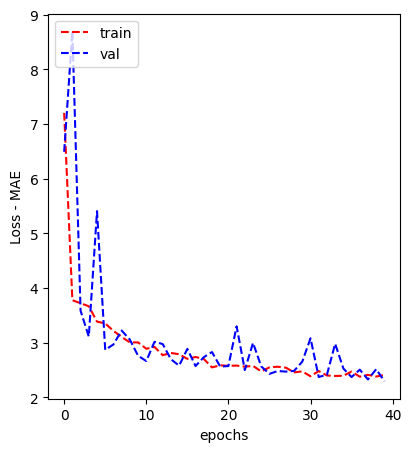

In [113]:
train_model(model2)